In [3]:
!pip install xgboost

In [4]:
!pip install shap-hypetune

     |████████████████████████████████| 356 kB 5.0 MB/s eta 0:00:01
  Created wheel for shap: filename=shap-0.39.0-cp39-cp39-linux_x86_64.whl size=418995 sha256=a6abefb588c34be1720d31a71786852b07e7274306af83cc1dd7a03201b6d4a1
  Stored in directory: /home/jovyan/.cache/pip/wheels/bb/91/16/f6a057925f93af7e4281f6afce3495b595b473342766eb451c
Successfully built shap


In [141]:
import numpy as np
np.random.seed(777)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

In [6]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,...,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,...,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2


In [145]:
from sklearn.preprocessing import LabelEncoder
features_target = ['target'] 

for feature in features_target:
    le = LabelEncoder()
    le.fit(train_df[feature])
    train_df[feature] = le.transform(train_df[feature])
    
print(train_df['target'].head())

0    5
1    5
2    1
3    7
4    1
Name: target, dtype: int64


In [146]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,...,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [147]:
train_results = pd.DataFrame(columns = ['percent', 'depth', 'missing_features', 'log_loss'])

<AxesSubplot:xlabel='target', ylabel='count'>

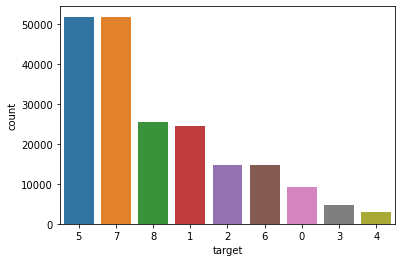

In [148]:
sns.countplot(x="target", data=train_df, order=train_df['target'].value_counts().index)

In [190]:
train_no_predict = train_df.drop(['id', 'target'], 1)
train_predict = train_df['target']

train_percent = 0.80

X_train, X_test, y_train, y_test = train_test_split(train_no_predict, train_predict, stratify=train_predict, train_size=train_percent)
print('train count: ', len(y_train))
print('test count: ', len(y_test))

train count:  160000
test count:  40000


In [12]:
from shaphypetune import BoostRFE

model = BoostRFE(XGBClassifier(), 
                 min_features_to_select=1, step=1,
                 importance_type='shap_importances', train_importance=False)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=6, verbose=0)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:49:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[15:51:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

<shaphypetune.BoostRFE>

In [21]:
print(model.estimator_)
print(model.n_features_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
61


In [66]:
dir(model)
print(model.ranking_)
dir(model.estimator_)
#model.ranking_
model.estimator_.evals_result_

good_feature_indexes = np.argwhere(model.ranking_ <= 1)
features_to_use = X_train.columns[good_feature_indexes]
print('to_use', features_to_use)


bad_feature_indexes = np.argwhere(model.ranking_ > 1)
features_to_avoid = X_train.columns[bad_feature_indexes]
print('to_avoid', features_to_avoid)

[ 7  1  1  1  1  1  9 14  1  1  1  2  1  1  1  5  1  1  1  1  1  1 12  1
  4  1  1  6  1  1  1  1  1  1  1  3 11  1  1  1  1 13  8  1  1  1  1 15
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 10]
to_use [['feature_1']
 ['feature_2']
 ['feature_3']
 ['feature_4']
 ['feature_5']
 ['feature_8']
 ['feature_9']
 ['feature_10']
 ['feature_12']
 ['feature_13']
 ['feature_14']
 ['feature_16']
 ['feature_17']
 ['feature_18']
 ['feature_19']
 ['feature_20']
 ['feature_21']
 ['feature_23']
 ['feature_25']
 ['feature_26']
 ['feature_28']
 ['feature_29']
 ['feature_30']
 ['feature_31']
 ['feature_32']
 ['feature_33']
 ['feature_34']
 ['feature_37']
 ['feature_38']
 ['feature_39']
 ['feature_40']
 ['feature_43']
 ['feature_44']
 ['feature_45']
 ['feature_46']
 ['feature_48']
 ['feature_49']
 ['feature_50']
 ['feature_51']
 ['feature_52']
 ['feature_53']
 ['feature_54']
 ['feature_55']
 ['feature_56']
 ['feature_57']
 ['feature_58']
 ['feature_59']
 ['feature_60']
 [

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [72]:
for i, rank in enumerate(model.ranking_):
    feature = X_train.columns[i]
    print(feature, ':', rank)

feature_0 : 7
feature_1 : 1
feature_2 : 1
feature_3 : 1
feature_4 : 1
feature_5 : 1
feature_6 : 9
feature_7 : 14
feature_8 : 1
feature_9 : 1
feature_10 : 1
feature_11 : 2
feature_12 : 1
feature_13 : 1
feature_14 : 1
feature_15 : 5
feature_16 : 1
feature_17 : 1
feature_18 : 1
feature_19 : 1
feature_20 : 1
feature_21 : 1
feature_22 : 12
feature_23 : 1
feature_24 : 4
feature_25 : 1
feature_26 : 1
feature_27 : 6
feature_28 : 1
feature_29 : 1
feature_30 : 1
feature_31 : 1
feature_32 : 1
feature_33 : 1
feature_34 : 1
feature_35 : 3
feature_36 : 11
feature_37 : 1
feature_38 : 1
feature_39 : 1
feature_40 : 1
feature_41 : 13
feature_42 : 8
feature_43 : 1
feature_44 : 1
feature_45 : 1
feature_46 : 1
feature_47 : 15
feature_48 : 1
feature_49 : 1
feature_50 : 1
feature_51 : 1
feature_52 : 1
feature_53 : 1
feature_54 : 1
feature_55 : 1
feature_56 : 1
feature_57 : 1
feature_58 : 1
feature_59 : 1
feature_60 : 1
feature_61 : 1
feature_62 : 1
feature_63 : 1
feature_64 : 1
feature_65 : 1
feature_66 : 1


In [191]:
# reduce bottom 6
from sklearn.decomposition import PCA
pca_columns = ['feature_47', 'feature_7', 'feature_41', 'feature_22', 'feature_36', 'feature_74']
pca_train_data = X_train[pca_columns]
pca_test_data = X_test[pca_columns]

pca = PCA(n_components=2)
pca_train_results = pca.fit_transform(X = pca_train_data, y = y_train)
pca_train_df = pd.DataFrame(data = pca_train_results, columns = ['pc1', 'pc2'])
X_train_modifed = pd.concat([pca_train_df, X_train], axis = 1)

pca_test_results = pca.transform(pca_test_data)
pca_test_df = pd.DataFrame(data = pca_test_results, columns = ['pc1', 'pc2'])
X_test_modifed = pd.concat([pca_test_df, X_test], axis = 1)

In [181]:
# reduce next 6
from sklearn.decomposition import PCA
pca_columns2 = ['feature_6', 'feature_42', 'feature_0', 'feature_27', 'feature_15', 'feature_24']
pca_train_data = X_train[pca_columns2]
pca_test_data = X_test[pca_columns2]

pca = PCA(n_components=2)
pca_train_results = pca.fit_transform(X = pca_train_data, y = y_train)
pca_train_df = pd.DataFrame(data = pca_train_results, columns = ['pc1.1', 'pc2.1'])
X_train_modifed = pd.concat([pca_train_df, X_train], axis = 1)

pca_test_results = pca.transform(pca_test_data)
pca_test_df = pd.DataFrame(data = pca_test_results, columns = ['pc1.1', 'pc2.1'])
X_test_modifed = pd.concat([pca_test_df, X_test], axis = 1)

In [192]:
import datetime;
print(datetime.datetime.now())

missing_columns = np.concatenate([pca_columns])

X_train_without_worst = X_train.drop(missing_columns, 1)
X_test_without_worst = X_test.drop(missing_columns, 1)

xgb_model = XGBClassifier()
parameters = { 'seed': [777], 'n_estimators': [300], 'early_stopping_rounds': [25],
               'learning_rate': [0.05], 'max_depth': [4], 'subsample': [0.8] }

clf = GridSearchCV(xgb_model, parameters, 
                   cv=StratifiedKFold(n_splits=6, shuffle=True),
                   n_jobs=-1, verbose=2, refit=True, scoring='neg_log_loss')

clf.fit(X_train_without_worst, y_train)
print(datetime.datetime.now())

2021-06-20 21:48:24.020176
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:43:58] WARNING: ../src/learner.cc:573: 
Parameters: { "early_stopping_rounds" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:43:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
2021-06-20 22:49:16.825585


In [193]:
print(clf.best_params_)
print('test log_loss', clf.best_score_)

# run on the holdout data
test_probs = clf.predict_proba(X_test_without_worst)
the_log_loss = abs(log_loss(y_test, test_probs))
print(the_log_loss)

params = clf.best_params_.copy()
params['missing_columns'] = ', '.join(map(str, missing_columns))
params['train_percent'] = str(train_percent * 100) + '%'
params['log_loss'] = the_log_loss

#results_df = pd.DataFrame(columns = params)
results_df = results_df.append(params, ignore_index=True)
results_df

{'early_stopping_rounds': 25, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'seed': 777, 'subsample': 0.8}
test log_loss -1.7511143539914589
1.7514340982886962


,early_stopping_rounds,learning_rate,max_depth,n_estimators,seed,subsample,missing_columns,train_percent,log_loss
0,25,0.05,4,100,777,0.8,"feature_47, feature_7, feature_41",10.0%,1.765198
1,25,0.05,3,100,777,0.8,"feature_47, feature_7, feature_41",10.0%,1.767728
2,25,0.05,3,250,777,0.8,"feature_47, feature_7",80.0%,1.750769
3,25,0.05,4,500,777,0.8,"feature_47, feature_7",80.0%,1.750218
4,25,0.05,3,500,777,0.8,"feature_47, feature_7",80.0%,1.749678
5,25,0.05,4,300,777,0.8,"feature_47, feature_7",80.0%,1.749346
6,25,0.05,5,300,777,0.8,"feature_47, feature_7",80.0%,1.749655
7,25,0.05,4,300,777,0.8,"feature_47, feature_7",80.0%,1.746734
8,25,0.05,4,300,777,0.8,"feature_47, feature_7, feature_41, feature_22,...",66.0%,1.750781
9,25,0.05,4,300,777,0.8,"feature_47, feature_7, feature_41, feature_22,...",66.0%,1.750926


In [100]:
#results_df = results_df.drop(2)

In [123]:
the_log_loss = abs(log_loss(y_test, test_probs))
the_clip = np.clip(test_probs, 0.001, 0.999)
the_clip_log_loss = abs(log_loss(y_test, the_clip))

print(the_log_loss)
print(the_clip_log_loss)

1.7496554059509188
1.7496554059509188


In [152]:
test_df_modified = test_df.drop('id', 1)
test_df_modified = test_df_modified.drop(missing_columns, 1)
test_preds = clf.predict_proba(test_df_modified)

In [153]:
submission = pd.DataFrame(test_preds)
submission.columns = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9']
submission['id'] = test_df['id']

submission.to_csv("submission.csv", index=False)